# Student Habits vs Their Performance Dataset

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

# Exploring The Data

In [2]:
df = pd.read_csv('student_habits_performance.csv')
df.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [25]:
df.isna().sum()

student_id                       0
age                              0
gender                           0
study_hours_per_day              0
social_media_hours               0
netflix_hours                    0
part_time_job                    0
attendance_percentage            0
sleep_hours                      0
diet_quality                     0
exercise_frequency               0
parental_education_level         0
internet_quality                 0
mental_health_rating             0
extracurricular_participation    0
exam_score                       0
dtype: int64

#### There are no Null Values

In [5]:
df['exam_score'].value_counts()

exam_score
100.0    48
80.9      7
65.6      7
74.0      7
70.7      7
         ..
69.8      1
46.8      1
45.4      1
57.0      1
55.7      1
Name: count, Length: 480, dtype: int64

In [6]:
df.describe()

,age,study_hours_per_day,social_media_hours,netflix_hours,attendance_percentage,sleep_hours,exercise_frequency,mental_health_rating,exam_score
count,1000.0000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.4980,3.55010,2.505500,1.819700,84.131700,6.470100,3.042000,5.438000,69.601500
std,2.3081,1.46889,1.172422,1.075118,9.399246,1.226377,2.025423,2.847501,16.888564
min,17.0000,0.00000,0.000000,0.000000,56.000000,3.200000,0.000000,1.000000,18.400000
25%,18.7500,2.60000,1.700000,1.000000,78.000000,5.600000,1.000000,3.000000,58.475000
50%,20.0000,3.50000,2.500000,1.800000,84.400000,6.500000,3.000000,5.000000,70.500000
75%,23.0000,4.50000,3.300000,2.525000,91.025000,7.300000,5.000000,8.000000,81.325000
max,24.0000,8.30000,7.200000,5.400000,100.000000,10.000000,6.000000,10.000000,100.000000


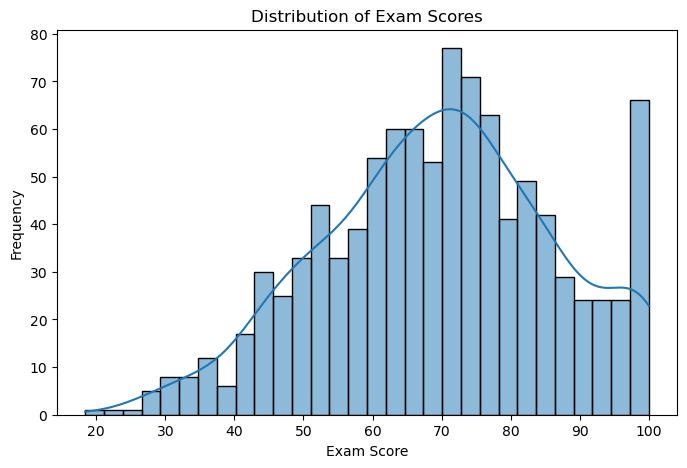

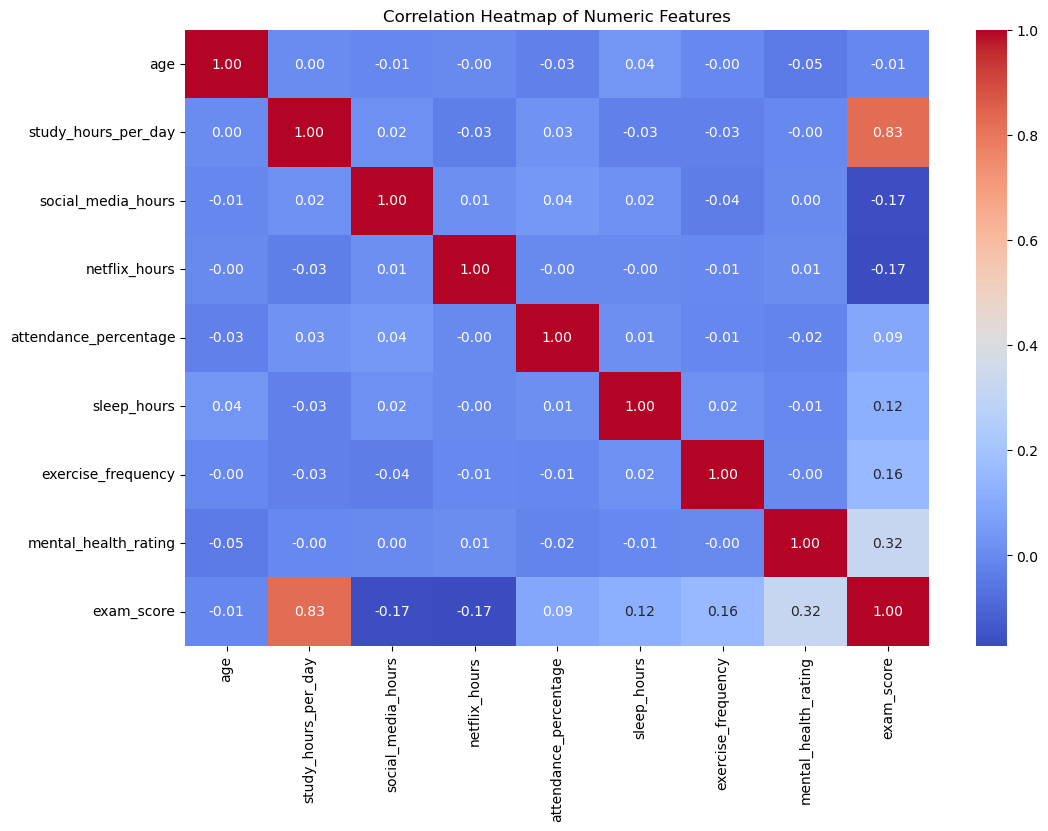

In [52]:
# Visualize the distribution of the target variable (exam_score)
plt.figure(figsize=(8, 5))
sns.histplot(df['exam_score'], kde=True, bins=30)
plt.title('Distribution of Exam Scores')
plt.xlabel('Exam Score')
plt.ylabel('Frequency')
plt.show()

# Visualize correlation heatmap for numeric features
plt.figure(figsize=(12, 8))
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()


# Preprocessing

In [7]:
# Handle categorical variables
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['part_time_job'] = le.fit_transform(df['part_time_job'])
df['diet_quality'] = le.fit_transform(df['diet_quality'])
df['parental_education_level'] = le.fit_transform(df['parental_education_level'])
df['internet_quality'] = le.fit_transform(df['internet_quality'])
df['extracurricular_participation'] = le.fit_transform(df['extracurricular_participation'])

In [8]:
# Select features
features = ['age', 'gender', 'study_hours_per_day', 'social_media_hours', 'netflix_hours', 
           'part_time_job', 'attendance_percentage', 'sleep_hours', 'diet_quality', 
           'exercise_frequency', 'parental_education_level', 'internet_quality', 
           'mental_health_rating', 'extracurricular_participation']

X = df[features]
y = df['exam_score']

## Creating a test set

In [9]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print('Training set shape:', X_train_scaled.shape)
print('Test set shape:', X_test_scaled.shape)

Training set shape: (800, 14)
Test set shape: (200, 14)


In [12]:
X_train_scaled

array([[-0.210232  , -0.96200758, -1.04978529, ...,  1.76710674,
         1.59248824,  1.44940512],
       [ 0.65894423, -0.96200758,  1.91518641, ...,  0.35200625,
         0.18864186, -0.68993823],
       [-0.210232  , -0.96200758, -0.71285669, ...,  0.35200625,
         0.89056505, -0.68993823],
       ...,
       [-0.210232  , -0.96200758,  0.02838623, ...,  1.76710674,
         0.89056505,  1.44940512],
       [ 1.52812047,  0.76744425, -1.04978529, ..., -1.06309424,
        -0.86424293,  1.44940512],
       [-1.07940824,  0.76744425,  0.50008628, ..., -1.06309424,
        -1.56616612, -0.68993823]], shape=(800, 14))

In [13]:
X_test_scaled

array([[ 1.09353235,  0.76744425, -0.03899949, ...,  0.35200625,
        -0.86424293, -0.68993823],
       [ 0.22435612,  0.76744425,  1.5782578 , ..., -1.06309424,
        -1.56616612,  1.44940512],
       [ 1.09353235, -0.96200758,  0.63485772, ..., -1.06309424,
        -0.51328133,  1.44940512],
       ...,
       [ 0.65894423,  0.76744425, -0.51069953, ..., -1.06309424,
         1.59248824, -0.68993823],
       [-1.07940824, -0.96200758,  0.16315768, ..., -1.06309424,
         1.24152664, -0.68993823],
       [ 1.09353235, -0.96200758,  0.567472  , ...,  0.35200625,
        -0.16231974, -0.68993823]], shape=(200, 14))

# Model Training & Evaluation

In [14]:
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [15]:
# Train and evaluate each model
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'RMSE': rmse, 'R2': r2}
    
# RMSE (Root Mean Squared Error) measures the average prediction error
# R2 indicates how well the model explains the variance in exam scores

In [16]:
# Results
for name, metrics in results.items():
    print(f'{name}:')
    print(f'RMSE: {metrics["RMSE"]:.2f}')
    print(f'R2: {metrics["R2"]:.2f}')

Linear Regression:
RMSE: 5.14
R2: 0.90
Ridge:
RMSE: 5.14
R2: 0.90
Lasso:
RMSE: 5.77
R2: 0.87
Random Forest:
RMSE: 6.25
R2: 0.85


### Both Linear Regression and Ridge performed best, with an R2 of 0.90 and the lowest RMSE.

# Hyperparameter Tuning using GridSearchCV

## Ridge regression tuning

In [17]:
ridge_params = {'alpha': [0.01, 0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, cv=5, scoring='neg_mean_squared_error')
ridge_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_squared_error')

## Random Forest tuning

In [18]:
rf_params = {'n_estimators': [50, 100, 200], 'max_depth': [None, 5, 10, 20]}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, cv=5, scoring='neg_mean_squared_error')
rf_grid.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 20],
                         'n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error')

## Evaluate best models

In [19]:
ridge_best = ridge_grid.best_estimator_
rf_best = rf_grid.best_estimator_

ridge_pred = ridge_best.predict(X_test_scaled)
rf_pred = rf_best.predict(X_test_scaled)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_pred))
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_pred))
ridge_r2 = r2_score(y_test, ridge_pred)
rf_r2 = r2_score(y_test, rf_pred)

print('Best Ridge alpha:', ridge_grid.best_params_['alpha'])
print('Tuned Ridge RMSE:', ridge_rmse)
print('Tuned Ridge R2:', ridge_r2)
print('Best Random Forest params:', rf_grid.best_params_)
print('Tuned Random Forest RMSE:', rf_rmse)
print('Tuned Random Forest R2:', rf_r2)

Best Ridge alpha: 1
Tuned Ridge RMSE: 5.140795166049661
Tuned Ridge R2: 0.8969392500635749
Best Random Forest params: {'max_depth': 20, 'n_estimators': 200}
Tuned Random Forest RMSE: 6.2258940188984155
Tuned Random Forest R2: 0.8488402566666808
